In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sas7bdat import SAS7BDAT
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

In [2]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV as RandomCV

In [34]:
with SAS7BDAT(r'maize.sas7bdat', skip_header=False) as reader:
    maize = reader.to_data_frame()
maize

[maize.sas7bdat] column count mismatch
[maize.sas7bdat] column count mismatch


,Geno_Code,pop,m1,m2,m3,m4,m5,m6,m7,m8,...,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389,Entry,DtoA
0,Z001E0001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,75.5364
1,Z001E0002,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,76.9075
2,Z001E0003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,75.2646
3,Z001E0004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,73.6933
4,Z001E0005,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,79.2441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Z026E0196,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,196.0,77.6523
4977,Z026E0197,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,197.0,78.5015
4978,Z026E0198,25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,77.4219
4979,Z026E0199,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,199.0,78.6712


In [4]:
maize.shape

(4981, 7393)

In [38]:
#Drop NaN data
maize=maize.dropna(how='any')
maize.shape

(4494, 7393)

Text(0, 0.5, 'Count')

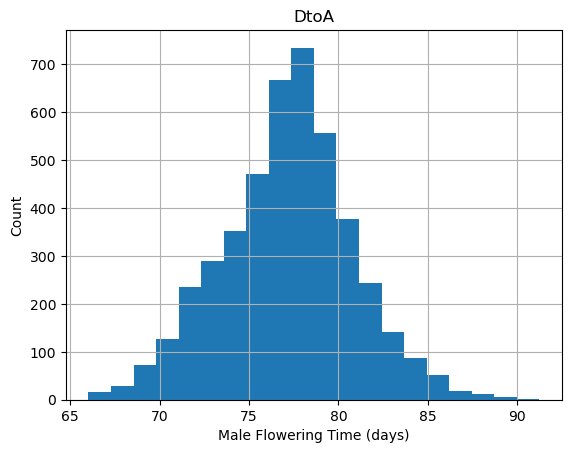

In [6]:
maize.hist(column = 'DtoA', bins = 20)
plt.xlabel("Male Flowering Time (days)")
plt.ylabel("Count")

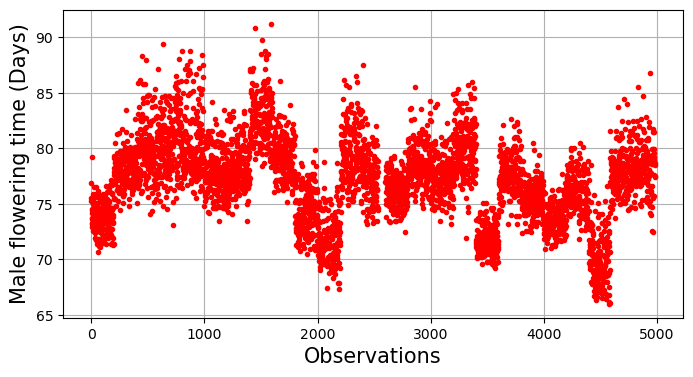

In [40]:
#Male flowering time distribution
fig,ax=plt.subplots(figsize=(8,4))
ax.plot(maize['DtoA'],'.',color='red')
plt.ylabel('Male flowering time (Days)',size='15')
plt.xlabel('Observations',size='15')
plt.grid(True)
#plt.savefig("Male Flowering time.png",dpi = 300)

In [42]:
#Drop unnecessary variable
maize=maize.drop(['Geno_Code','pop','Entry'],axis=1)

In [9]:
maize.describe()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389,DtoA
count,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,...,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000
mean,0.989524,0.989505,0.989487,0.989425,0.989356,0.989288,0.989219,0.989150,0.989081,0.988909,...,0.995419,0.995496,0.995541,0.995550,0.995550,0.995550,0.995550,0.995550,0.995550,77.152452
std,0.960649,0.960632,0.960617,0.960562,0.960513,0.960477,0.960455,0.960446,0.960450,0.960384,...,0.962801,0.962863,0.962903,0.962912,0.962912,0.962912,0.962912,0.962912,0.962912,3.673233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.015800
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.847850
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.343250
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,79.401100
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,91.234900


In [10]:
maize['m6'].unique()

array([1.        , 2.        , 0.        , 1.50384815, 1.35508548])

In [11]:
maize

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389,DtoA
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.5364
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,76.9075
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.2646
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,73.6933
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.2441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,77.6523
4977,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,78.5015
4978,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.4219
4979,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,78.6712


In [43]:
#Fit a Random Forest model
y = np.array(maize.DtoA)
#Drop unnecessary variables
maize.drop(['DtoA'],1,inplace=True)
#Define input variable
X=maize.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)

C:\Users\User\AppData\Local\Temp\ipykernel_8896\1796651613.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  maize.drop(['DtoA'],1,inplace=True)


In [13]:
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
#plt.title("Overfitting test to decide Max_depth for Random Forest");

KeyboardInterrupt: 

In [44]:
#Fit a random forest regressor with max_depth = 5
forest = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=6608)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.219
Accuracy on test set: 0.054


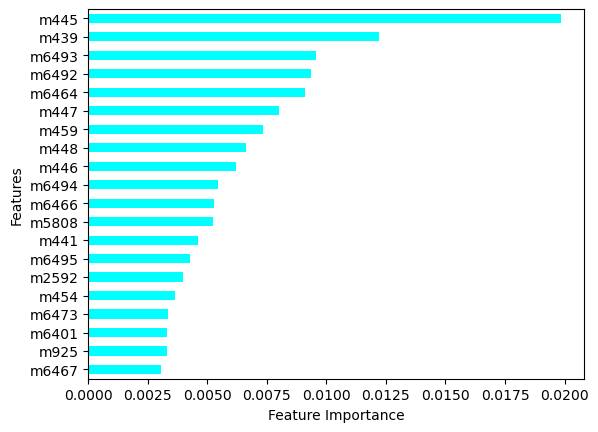

In [46]:
#Check feature importance for top 20 features
a = np.array(maize.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_20 = result.tail(20)
#Draw feature importance plot
result_20.plot.barh(x='Features', y='Importance',legend=False, color = 'cyan');
plt.xlabel('Feature Importance');
plt.savefig('RF_Feature_Importance.png',dpi = 300)

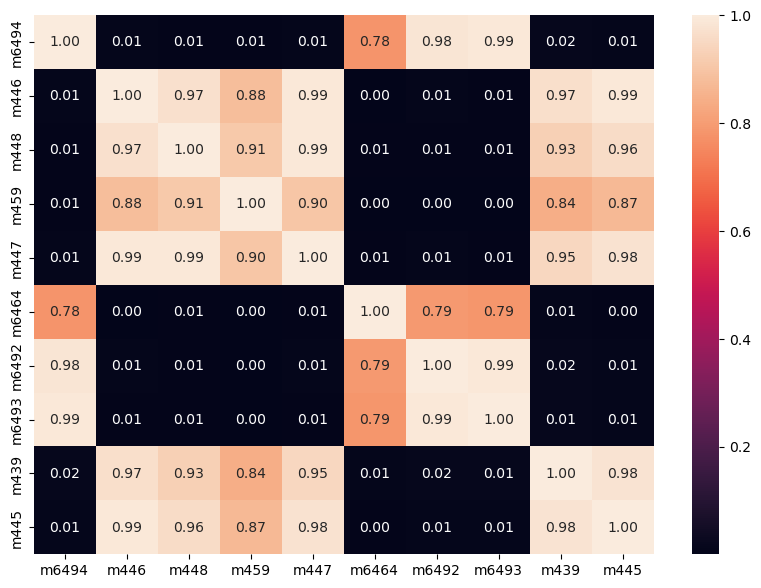

In [16]:
#Draw pearson correlation plot
result_10 = result.tail(10)
feature_list = list(result_10['Features'])
pearson = maize.filter(feature_list)
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(pearson.corr(),annot=True, fmt=".2f")
plt.axis('tight')
plt.savefig('corelation_10.png',dpi=300)
plt.show()

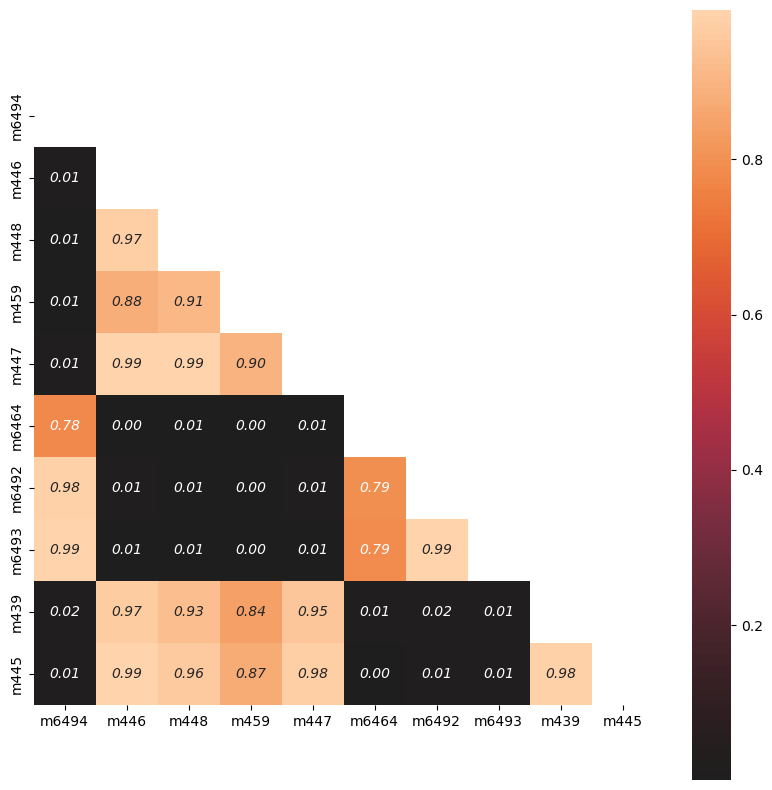

In [17]:
# correlation
corrM = pearson.corr(method='pearson')
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
mask = np.triu(np.ones_like(corrM, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws, mask = mask,center=0, square = True)
#plt.title("Correlation heatmap of top 10 features");
plt.savefig('Correlation matrix.png',dpi = 300, bbox_inches = 'tight')

In [47]:
#Check features with feature importance > 0.001
importances_threshold = result[result['Importance']>0.001]
to_filter = list(importances_threshold['Features'])

In [48]:
result_137 = result.tail(137)
maize_137 = maize[result_137.Features]

In [49]:
# Create correlation matrix
corr_matrix_new = maize_137.corr(method='pearson').abs()
# Select upper triangle of correlation matrix
upper = corr_matrix_new.where(np.triu(np.ones(corr_matrix_new.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.55
to_drop = [column for column in upper.columns if any(upper[column] > 0.55)]

In [50]:
maize_uncorrelated = maize_137.drop(to_drop, axis=1)
maize_uncorrelated

,m1447,m5390,m1131,m5636,m1634,m184,m2431,m433,m3134,m3966,...,m5509,m2960,m3453,m4772,m6901,m4393,m1291,m7034,m923,m4303
0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.9076,0.0,...,1.000000,0.0,2.0,2.000000,0.0,2.0,2.0,0.000000,1.0,2.0
1,2.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0000,2.0,...,0.000000,2.0,2.0,2.000000,2.0,2.0,1.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0000,0.0,...,0.000000,0.0,2.0,0.000000,2.0,2.0,0.0,0.000000,2.0,2.0
3,0.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0000,0.0,...,0.482964,2.0,0.0,2.000000,2.0,2.0,2.0,2.000000,2.0,0.0
4,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0000,0.0,...,2.000000,0.0,1.0,2.000000,0.0,2.0,2.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0000,0.0,...,2.000000,2.0,2.0,1.672380,2.0,2.0,1.0,0.943094,2.0,2.0
4977,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0000,0.0,...,1.000000,1.0,0.0,2.000000,2.0,0.0,1.0,2.000000,2.0,2.0
4978,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2.0,0.0
4979,0.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0000,0.0,...,2.000000,2.0,0.0,2.000000,2.0,2.0,0.0,2.000000,0.0,0.0


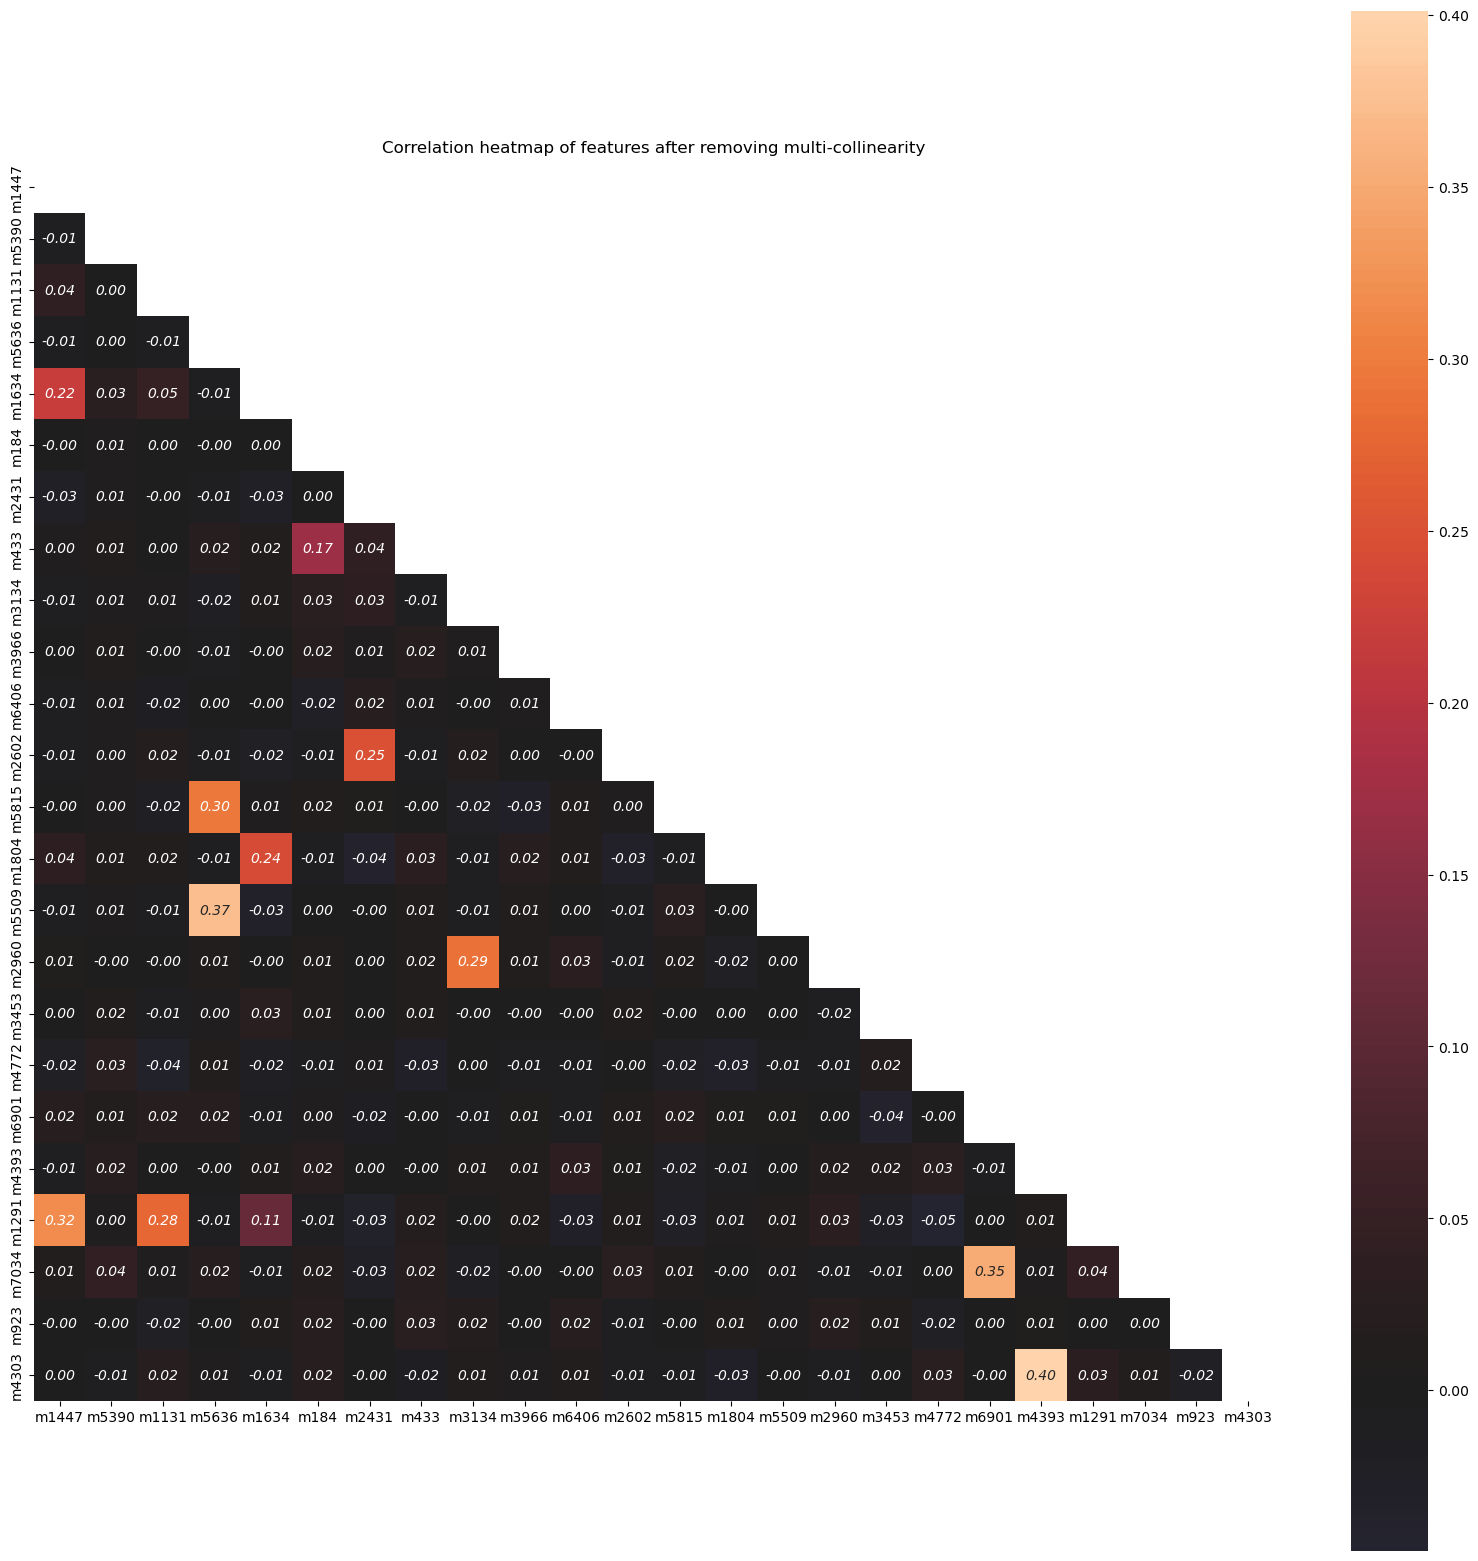

In [22]:
# Final correlation plot

corrM = maize_uncorrelated.corr(method='pearson')
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
mask = np.triu(np.ones_like(corrM, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws, mask = mask,center=0, square = True)
plt.title("Correlation heatmap of features after removing multi-collinearity");
plt.savefig('Correlation matrix_uncorrelated features.png',dpi = 300, bbox_inches = 'tight')

In [23]:
maize_uncorrelated_cols = pd.DataFrame(maize_uncorrelated.columns,columns = ['Features'])
maize_uncorrelated_cols = pd.merge(maize_uncorrelated_cols,result, how = 'inner')
maize_uncorrelated_cols = maize_uncorrelated_cols.sort_values(by = 'Importance', ascending = False, ignore_index=True)

In [24]:
maize_uncorrelated_cols_top10 = maize_uncorrelated_cols.head(10)
maize_uncorrelated_cols_top10

,Features,Importance
0,m4303,0.002890
1,m923,0.001921
2,m7034,0.001766
3,m1291,0.001666
4,m4393,0.001533
5,m6901,0.001453
6,m4772,0.001383
7,m3453,0.001230
8,m2960,0.001207
9,m5509,0.001169


In [25]:
maize_uncorrelated_top10 = maize_uncorrelated[maize_uncorrelated.columns[maize_uncorrelated.columns.isin(maize_uncorrelated_cols_top10['Features'].to_list())]]
maize_uncorrelated_top10
#Source: https://towardsdatascience.com/interesting-ways-to-select-pandas-dataframe-columns-b29b82bbfb33

,m5509,m2960,m3453,m4772,m6901,m4393,m1291,m7034,m923,m4303
0,1.000000,0.0,2.0,2.000000,0.0,2.0,2.0,0.000000,1.0,2.0
1,0.000000,2.0,2.0,2.000000,2.0,2.0,1.0,0.000000,0.0,0.0
2,0.000000,0.0,2.0,0.000000,2.0,2.0,0.0,0.000000,2.0,2.0
3,0.482964,2.0,0.0,2.000000,2.0,2.0,2.0,2.000000,2.0,0.0
4,2.000000,0.0,1.0,2.000000,0.0,2.0,2.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4976,2.000000,2.0,2.0,1.672380,2.0,2.0,1.0,0.943094,2.0,2.0
4977,1.000000,1.0,0.0,2.000000,2.0,0.0,1.0,2.000000,2.0,2.0
4978,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2.0,0.0
4979,2.000000,2.0,0.0,2.000000,2.0,2.0,0.0,2.000000,0.0,0.0


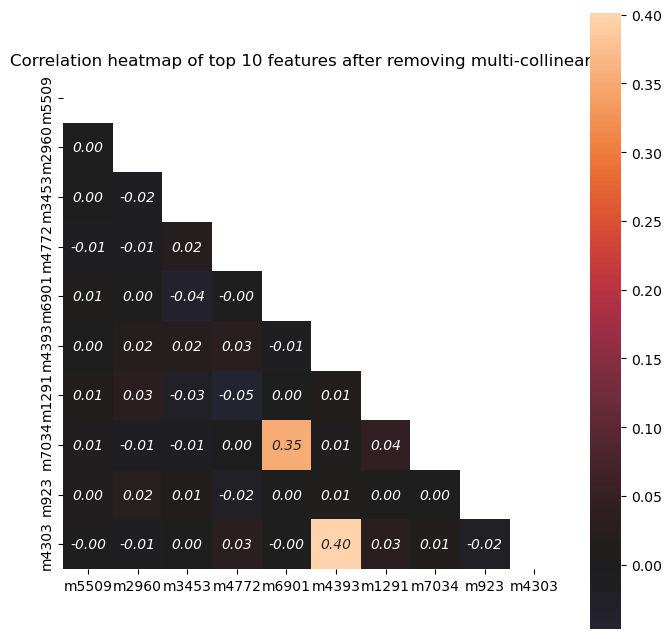

In [26]:
# Final correlation plot of top 10 features

corrM = maize_uncorrelated_top10.corr(method='pearson')
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
mask = np.triu(np.ones_like(corrM, dtype=bool))
plt.figure(figsize=(8,8))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws, mask = mask,center=0, square = True)
plt.title("Correlation heatmap of top 10 features after removing multi-collinearity");
plt.savefig('Correlation matrix_top 10_uncorrelated features.png',dpi = 300, bbox_inches = 'tight')

In [51]:
X=maize_uncorrelated.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)

In [52]:
#Run Linear regression model with top 24 features
maize_uncorrelated['DtoA'] = y
y = maize_uncorrelated['DtoA']
maize_uncorrelated.drop(['DtoA'],1,inplace=True)
X = maize_uncorrelated
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\User\AppData\Local\Temp\ipykernel_8896\4186166731.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  maize_uncorrelated.drop(['DtoA'],1,inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DtoA   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     11.80
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           4.89e-44
Time:                        22:45:49   Log-Likelihood:                -9019.6
No. Observations:                3370   AIC:                         1.809e+04
Df Residuals:                    3345   BIC:                         1.824e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.6851      0.281    265.991      0.000      74.135      75.236
m1447          0.2192      0.069      3.189      0.001       0.084       0.354
m5390         -0.0571      0.064     -0.897      0.370      -0.182       0.068
m1131         -0.0666      0.066     -1.004      0.315      -0.197       0.063
m5636         -0.0805      0.073     -1.108      0.268      -0.223       0.062
m1634          0.2485      0.067      3.704      0.000       0.117       0.380
m184           0.2067      0.064      3.222      0.001       0.081       0.332
m2431          0.2963      0.066      4.469      0.000       0.166       0.426
m433           0.4831      0.065      7.456      0.000       0.356       0.610
m3134          0.0969      0.067      1.447      0.148      -0.034       0.228
m3966          0.0787      0.064      1.228      0.219      -0.047       0.204
m6406          0.4195      0.064      6.575      0.000       0.294       0.545
m2602          0.1936      0.066      2.945      0.003       0.065       0.322
m5815          0.3790      0.067      5.663      0.000       0.248       0.510
m1804          0.1298      0.066      1.973      0.049       0.001       0.259
m5509          0.0345      0.069      0.498      0.618      -0.101       0.170
m2960          0.1388      0.067      2.064      0.039       0.007       0.271
m3453         -0.1238      0.063     -1.951      0.051      -0.248       0.001
m4772          0.1889      0.064      2.962      0.003       0.064       0.314
m6901          0.1180      0.069      1.698      0.090      -0.018       0.254
m4393         -0.0758      0.070     -1.078      0.281      -0.214       0.062
m1291         -0.0676      0.071     -0.955      0.340      -0.206       0.071
m7034          0.0449      0.068      0.658      0.510      -0.089       0.179
m923          -0.1205      0.064     -1.889      0.059      -0.246       0.005
m4303         -0.1963      0.070     -2.810      0.005      -0.333      -0.059
==============================================================================
Omnibus:                       29.489   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.480
Skew:                          -0.197   Prob(JB):                     1.46e-07
Kurtosis:                       3.263   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#RMSE check for different models
maize_uncorrelated['DtoA'] = y
y = np.array(maize_uncorrelated.DtoA)
maize_uncorrelated.drop(['DtoA'],1,inplace=True)
X = maize_uncorrelated.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
#Fit a random forest regressor with max_depth = 5
forest = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Check Accuracy
print('RMSE_Forest=',np.sqrt(mean_squared_error(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_8896\455642978.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  maize_uncorrelated.drop(['DtoA'],1,inplace=True)


RMSE_LR= 3.6906054441416285
RMSE_Ridge= 3.690597554053556
RMSE_Lasso= 3.6992840269235723
RMSE_Elastic= 3.799522288011804
RMSE_Forest= 3.6983659672683604


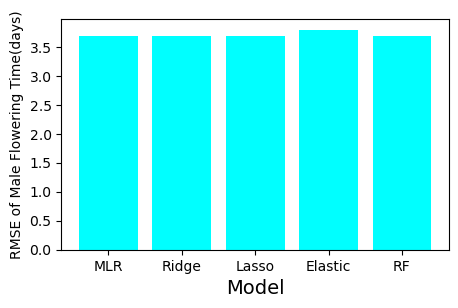

In [66]:
Model = ['MLR','Ridge','Lasso','Elastic','RF']
RMSE = [3.6906054441416285,3.6905975540535567,3.6992840269235727,3.799522288011804,3.6983659672683604]
plt.figure(figsize=(5,3))
plt.bar(Model,RMSE, color ='cyan')
plt.ylabel("RMSE of Male Flowering Time(days)")
plt.xlabel("Model", fontsize = 14)
plt.show()
#plt.savefig('barplot_Project_2.png', dpi = 300)

RMSE_Forest= 3.6983659672683604


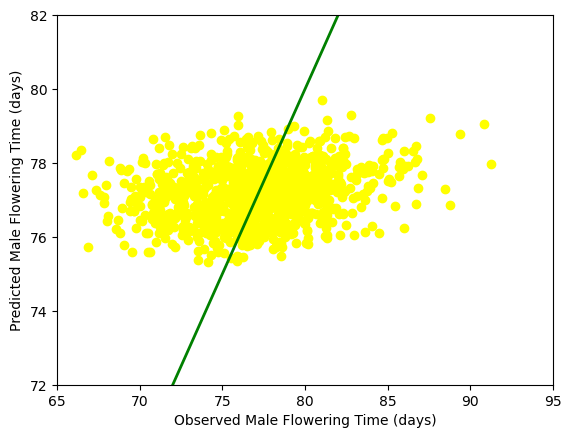

In [75]:
#Draw scatter plot for Random Forest Model
forest = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Check Accuracy
print('RMSE_Forest=',np.sqrt(mean_squared_error(y_test,y_pred)))
plt.scatter(y_test,y_pred, color = 'yellow')
x_45 = [65,95]
y_45 = [65,95]
plt.plot(x_45,y_45,'green', linewidth = 2);
plt.xlim([65, 95])
plt.ylim([72, 82])
plt.xlabel('Observed Male Flowering Time (days)');
plt.ylabel('Predicted Male Flowering Time (days)');
#plt.savefig('RF_Scatter_Project_2.png', dpi = 300)

RMSE_LR= 3.6906054441416285


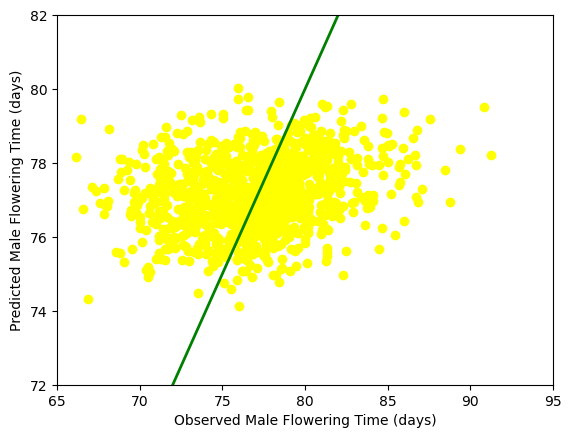

In [73]:
#Draw Scatter plot for linear regression model
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
plt.scatter(y_test,y_pred,color = 'yellow')
x_45 = [65,85]
y_45 = [65,85]
plt.plot(x_45,y_45,'green', linewidth = 2);
plt.xlim([65, 95])
plt.ylim([72, 82])
plt.xlabel('Observed Male Flowering Time (days)');
plt.ylabel('Predicted Male Flowering Time (days)');
#plt.savefig('LR_Scatter_Project_2.png', dpi = 300)